# **Analisis Data Penjualan Game Global**

## **Pendahuluan**
Proyek ini bertujuan untuk menganalisis data penjualan video game global dari https://www.kaggle.com/datasets/thiyagucom/game-sale-dataset untuk mengidentifikasi tren industri, preferensi pasar regional, dan pemain utama di pasar. Analisis ini akan menjawab lima pertanyaan bisnis utama berikut:
1. *Genre game apa yang paling populer secara global berdasarkan total penjualan?*
2. *Bagaimana tren jumlah game yang dirilis dari tahun ke tahun? Apakah industri game cenderung tumbuh atau menyusut?*
3. *Publisher mana yang memiliki kontribusi penjualan terbesar di masing-masing pasar (Amerika Utara, Eropa/PAL, Jepang)?*
4. *Platform game mana yang memiliki rata-rata penjualan per game tertinggi?*
5. *Genre game apa yang paling laku di masing-masing pasar (Amerika Utara, Eropa/PAL, Jepang)?*

## **Pembersihan dan Persiapan Data**
Sebelum analisis, data mentah dari `vgchartz-2024.csv` perlu dibersihkan terlebih dahulu. Proses yang saya lakukan meliputi:
* **Menangani Data Kosong:** Baris dengan data `release_date` dan `last_update` yang kosong dihapus untuk memastikan akurasi analisis tren. Kolom `developer` yang kosong diisi dengan 'Unknown', sementara kolom penjualan yang kosong diisi dengan nilai 0 dengan asumsi tidak ada penjualan yang tercatat.
* **Memperbaiki Tipe Data:** Kolom `release_date` dan `last_update` diubah dari tipe *object* menjadi *datetime* untuk memungkinkan analisis berbasis waktu.
* **Analisis Outliers:** Berdasarkan visualisasi boxplot, data penjualan memiliki banyak outliers. Namun, outliers ini tidak dihapus karena merepresentasikan game-game blockbuster yang sangat penting untuk analisis pasar.


In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('C:/Users/ASUS/Documents/Road to DA/vgchartz-2024.csv')

In [4]:
print(df.head())

                                             img                        title  \
0  /games/boxart/full_6510540AmericaFrontccc.jpg           Grand Theft Auto V   
1  /games/boxart/full_5563178AmericaFrontccc.jpg           Grand Theft Auto V   
2                    /games/boxart/827563ccc.jpg  Grand Theft Auto: Vice City   
3  /games/boxart/full_9218923AmericaFrontccc.jpg           Grand Theft Auto V   
4  /games/boxart/full_4990510AmericaFrontccc.jpg    Call of Duty: Black Ops 3   

  console    genre       publisher       developer  critic_score  total_sales  \
0     PS3   Action  Rockstar Games  Rockstar North           9.4        20.32   
1     PS4   Action  Rockstar Games  Rockstar North           9.7        19.39   
2     PS2   Action  Rockstar Games  Rockstar North           9.6        16.15   
3    X360   Action  Rockstar Games  Rockstar North           NaN        15.86   
4     PS4  Shooter      Activision        Treyarch           8.1        15.09   

   na_sales  jp_sales  pal

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           64016 non-null  object 
 1   title         64016 non-null  object 
 2   console       64016 non-null  object 
 3   genre         64016 non-null  object 
 4   publisher     64016 non-null  object 
 5   developer     63999 non-null  object 
 6   critic_score  6678 non-null   float64
 7   total_sales   18922 non-null  float64
 8   na_sales      12637 non-null  float64
 9   jp_sales      6726 non-null   float64
 10  pal_sales     12824 non-null  float64
 11  other_sales   15128 non-null  float64
 12  release_date  56965 non-null  object 
 13  last_update   17879 non-null  object 
dtypes: float64(6), object(8)
memory usage: 6.8+ MB
None


In [6]:
print(df.describe())

       critic_score   total_sales      na_sales     jp_sales     pal_sales  \
count   6678.000000  18922.000000  12637.000000  6726.000000  12824.000000   
mean       7.220440      0.349113      0.264740     0.102281      0.149472   
std        1.457066      0.807462      0.494787     0.168811      0.392653   
min        1.000000      0.000000      0.000000     0.000000      0.000000   
25%        6.400000      0.030000      0.050000     0.020000      0.010000   
50%        7.500000      0.120000      0.120000     0.040000      0.040000   
75%        8.300000      0.340000      0.280000     0.120000      0.140000   
max       10.000000     20.320000      9.760000     2.130000      9.850000   

        other_sales  
count  15128.000000  
mean       0.043041  
std        0.126643  
min        0.000000  
25%        0.000000  
50%        0.010000  
75%        0.030000  
max        3.120000  


### Menangani data kosong dengan melakukan pembersihan duplikat, dan menghapus data kosong yang ada di `release_date` dan `last_update`

In [ ]:
# Menangani data duplikat terlebih dahulu
print(f"Jumlah baris duplikat: {df.duplicated().sum()}")

Jumlah baris duplikat: 0


In [9]:
print("Jumlah missing values sebelum dibersihkan:")
print(df.isnull().sum())

Jumlah missing values sebelum dibersihkan:
img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57338
total_sales     45094
na_sales        51379
jp_sales        57290
pal_sales       51192
other_sales     48888
release_date     7051
last_update     46137
dtype: int64


In [10]:
# Menghapus baris di mana 'release_date' atau 'last_update' kosong
df_cleaned = df.dropna(subset=['release_date', 'last_update'])

print("\nJumlah missing values setelah dibersihkan: ")
print(df_cleaned.isnull().sum())


Jumlah missing values setelah dibersihkan: 
img                 0
title               0
console             0
genre               0
publisher           0
developer           2
critic_score    11629
total_sales      8564
na_sales        10181
jp_sales        10644
pal_sales       10269
other_sales      9619
release_date        0
last_update         0
dtype: int64


### Menangani data kosong dengan mengisi value di kolom `developer`, `critic_score`, dan kolom yang bertipe **float**.

In [12]:
# Mengisi nama Developer yang tidak diketahui dengan 'Uknown' 
df_cleaned['developer'].fillna('Uknown', inplace=True)
print(df_cleaned.isnull().sum())

img                 0
title               0
console             0
genre               0
publisher           0
developer           0
critic_score    11629
total_sales      8564
na_sales        10181
jp_sales        10644
pal_sales       10269
other_sales      9619
release_date        0
last_update         0
dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8524\2037469372.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['developer'].fillna('Uknown', inplace=True)


In [13]:
# Mengisi critic_score yang hilang dengan median
median_critic_score = df_cleaned['critic_score'].median()
df_cleaned['critic_score'].fillna(median_critic_score, inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8524\4236004778.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['critic_score'].fillna(median_critic_score, inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8524\4236004778.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['critic_score'].fillna(median_critic_score,

In [14]:
# Mengisi kolom-kolom penjualan, dengan 0
# Buat list berisi kolom-kolom penjualan
kolom_penjualan = ['total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']

# Mengisi nilai kosong dengan 0
df_cleaned[kolom_penjualan] = df_cleaned[kolom_penjualan].fillna(0)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_8524\2546342881.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[kolom_penjualan] = df_cleaned[kolom_penjualan].fillna(0)


In [15]:
print("\n--- Jumlah Missing Values Setelah Mengisi Kolom Penjualan ---")
print(df_cleaned.isnull().sum())


--- Jumlah Missing Values Setelah Mengisi Kolom Penjualan ---
img             0
title           0
console         0
genre           0
publisher       0
developer       0
critic_score    0
total_sales     0
na_sales        0
jp_sales        0
pal_sales       0
other_sales     0
release_date    0
last_update     0
dtype: int64


### Memperbaiki tipe data pada kolom `release_date` dan `last_update`

In [20]:
# Mengubah 'release_date' dan 'last_update' menjadi datetime
df_cleaned['release_date'] = pd.to_datetime(df_cleaned['release_date'])
df_cleaned['last_update'] = pd.to_datetime(df_cleaned['last_update'])

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12580 entries, 1 to 64014
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   img           12580 non-null  object        
 1   title         12580 non-null  object        
 2   console       12580 non-null  object        
 3   genre         12580 non-null  object        
 4   publisher     12580 non-null  object        
 5   developer     12580 non-null  object        
 6   critic_score  12580 non-null  float64       
 7   total_sales   12580 non-null  float64       
 8   na_sales      12580 non-null  float64       
 9   jp_sales      12580 non-null  float64       
 10  pal_sales     12580 non-null  float64       
 11  other_sales   12580 non-null  float64       
 12  release_date  12580 non-null  datetime64[ns]
 13  last_update   12580 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(6), object(6)
memory usage: 1.4+ MB


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8524\3256532078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['release_date'] = pd.to_datetime(df_cleaned['release_date'])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8524\3256532078.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['last_update'] = pd.to_datetime(df_cleaned['last_update'])


### Analisis Outliers

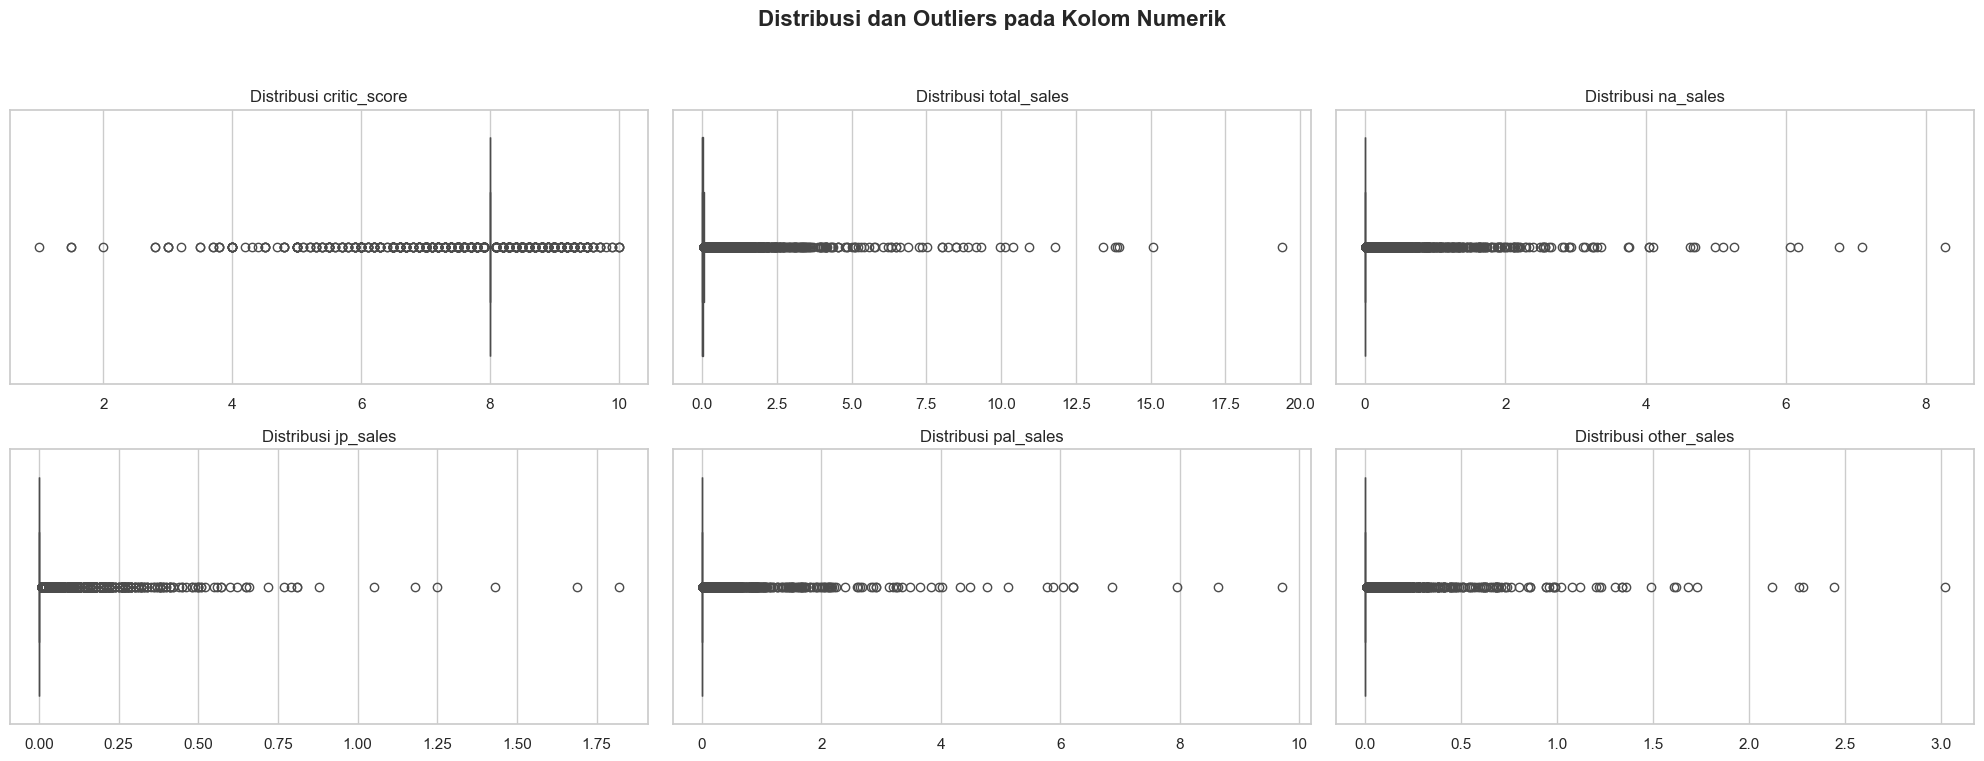

In [21]:
# Mengecek Outliers di beberapa kolom numerik seperti kolom penjualan
import seaborn as sns
import matplotlib.pyplot as plt

kolom_numerik = ['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']

sns.set_theme(style='whitegrid')

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 8))
fig.suptitle('Distribusi dan Outliers pada Kolom Numerik', fontsize=16, fontweight='bold')

for i, col in enumerate(kolom_numerik):
    ax = axes.flatten()[i]
    sns.boxplot(x=df_cleaned[col], ax=ax)
    ax.set_title(f'Distribusi {col}', fontsize=12)
    ax.set_xlabel('')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Dari hasil bloxplot tersebut, dapat disimpulkan bahwa mayoritas game terjual dalam jumlah kecil.

Segelintir game blockbuster mendominasi pasar, ditandai dengan titik-titik panjang di sebelah kanan (yang secara statistik dianggap outliers) adalah game-game super sukses seperti Grand Theft Auto, Call of Duty, atau Mario Kart. Meskipun jumlahnya sedikit, penjualan mereka sangat masif dan jauh melampaui game-game lainnya

### Analisis Statistik Deskriptif

In [22]:
print("--- Statistik Deskriptif dari Data Bersih ---")
print(df_cleaned.describe())

--- Statistik Deskriptif dari Data Bersih ---
       critic_score   total_sales      na_sales      jp_sales     pal_sales  \
count  12580.000000  12580.000000  12580.000000  12580.000000  12580.000000   
mean       7.976486      0.124655      0.053526      0.011498      0.044868   
min        1.000000      0.000000      0.000000      0.000000      0.000000   
25%        8.000000      0.000000      0.000000      0.000000      0.000000   
50%        8.000000      0.000000      0.000000      0.000000      0.000000   
75%        8.000000      0.020000      0.000000      0.000000      0.000000   
max       10.000000     19.390000      8.270000      1.820000      9.710000   
std        0.366587      0.628340      0.282913      0.055172      0.286103   

        other_sales                   release_date  \
count  12580.000000                          12580   
mean       0.014713  2014-11-14 12:47:57.710651648   
min        0.000000            1971-12-03 00:00:00   
25%        0.000000       

### **Pertanyaan 1: Genre Game Apa yang Paling Populer Secara Global?**
Untuk menjawab pertanyaan ini, saya mengelompokkan data berdasarkan genre dan menjumlahkan total penjualan globalnya, lalu memvisualisasikannya dalam bentuk bar chart.



--- Analisis Pertanyaan 1: Genre Paling Populer Global ---
genre
Shooter             362.63
Sports              283.39
Action              225.02
Action-Adventure    148.52
Role-Playing        132.47
Name: total_sales, dtype: float64


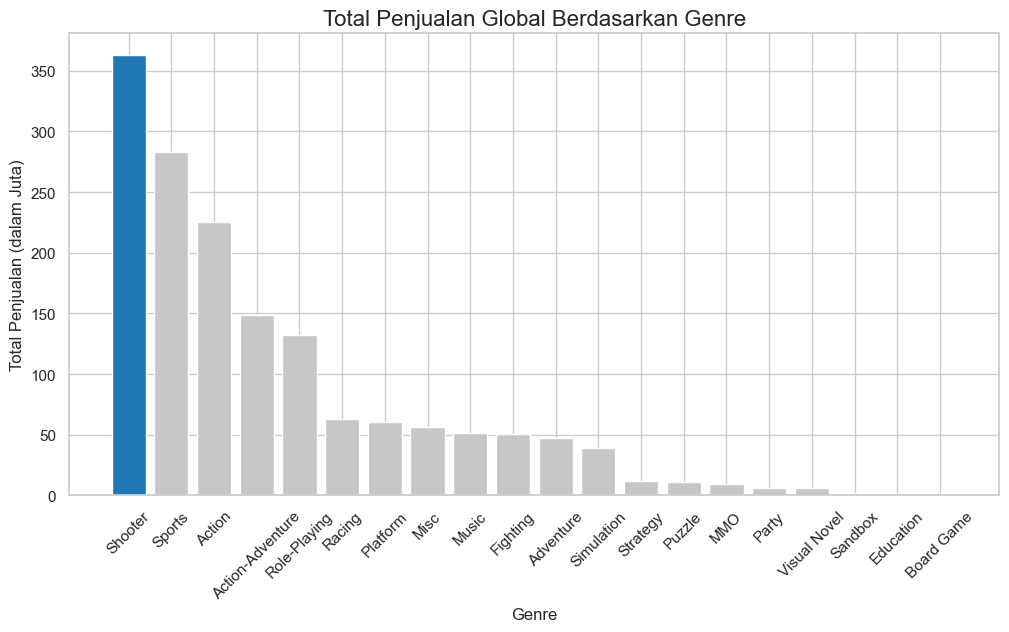

In [60]:
print("\n\n--- Analisis Pertanyaan 1: Genre Paling Populer Global ---")
genre_sales = df_cleaned.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print(genre_sales.head())

plt.figure(figsize=(12, 6))
colors = ['#1f77b4' if (x == genre_sales.values.max()) else '#c7c7c7' for x in genre_sales.values]
plt.bar(x=genre_sales.index, height=genre_sales.values, color=colors)
plt.title('Total Penjualan Global Berdasarkan Genre', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Total Penjualan (dalam Juta)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Interpretasi:**
Dari grafik di atas, terlihat jelas bahwa genre **Shooter** adalah yang paling populer secara global dengan total penjualan mencapai lebih dari 350 juta kopi. Genre **Sports** dan **Action** menyusul di posisi kedua dan ketiga. Hal ini menunjukkan bahwa game dengan aksi cepat dan kompetitif memiliki pasar terbesar di seluruh dunia.

### **Pertanyaan 2: Bagaimana tren jumlah game yang dirilis dari tahun ke tahun?**
Untuk memahami pertumbuhan industri game, saya menganalisis jumlah game yang dirilis setiap tahunnya. Data tahun diekstrak dari kolom `release_date`, lalu dihitung dan diurutkan. Hasilnya divisualisasikan menggunakan line chart untuk menunjukkan tren dari waktu ke waktu.



--- Analisis Pertanyaan 2: Tren Rilis Game Tahunan ---
year_of_release
2020    1154
2021     420
2022     167
2023     108
2024      22
Name: count, dtype: int64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8524\1035785451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['year_of_release'] = df_cleaned['release_date'].dt.year


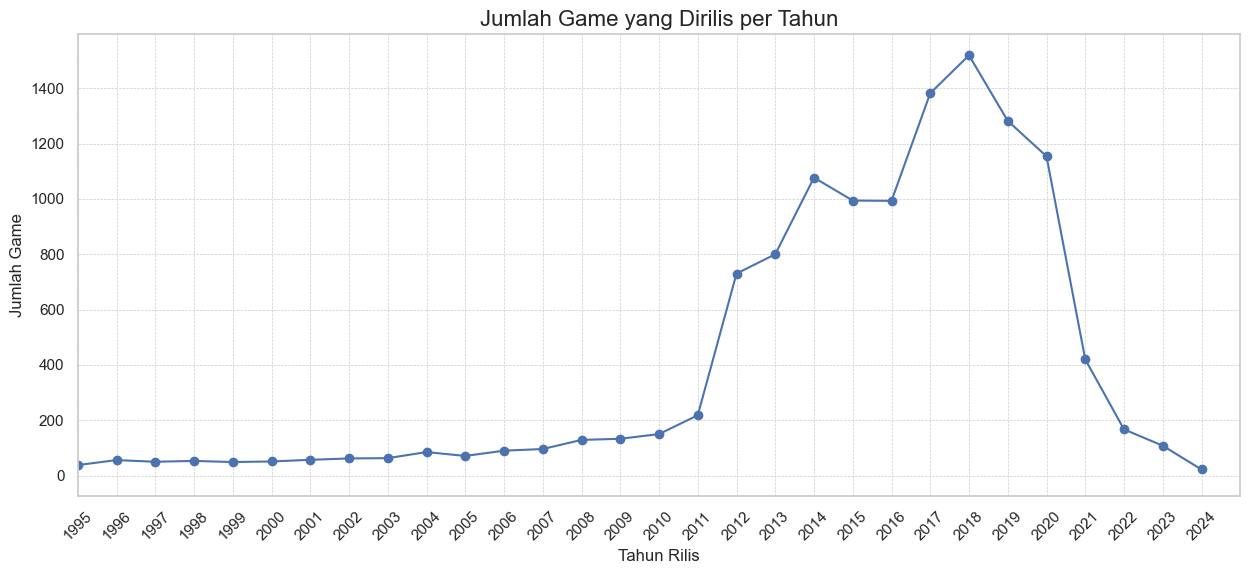

In [29]:
print("\n\n--- Analisis Pertanyaan 2: Tren Rilis Game Tahunan ---")
df_cleaned['year_of_release'] = df_cleaned['release_date'].dt.year
games_per_year = df_cleaned['year_of_release'].value_counts().sort_index()
print(games_per_year.tail())

plt.figure(figsize=(15, 6))
plt.plot(games_per_year.index, games_per_year.values, marker='o', linestyle='-')
plt.title('Jumlah Game yang Dirilis per Tahun', fontsize=16)
plt.xlabel('Tahun Rilis', fontsize=12)
plt.ylabel('Jumlah Game', fontsize = 12)
tahun_mulai = 1995
tahun_akhir = 2025
plt.xticks(ticks=range(tahun_mulai, tahun_akhir, 1), rotation=45)
plt.grid(True, which='major', linestyle='--', linewidth=0.5)
plt.xlim(1995, 2025)
plt.show()

**Interpretasi:**
Grafik di atas menunjukkan pertumbuhan eksponensial dalam jumlah game yang dirilis, dimulai sekitar tahun 2005 dan mencapai puncaknya pada tahun 2018. Setelah tahun 2018, terjadi penurunan yang signifikan dalam jumlah rilis game yang tercatat. Tren ini bisa menandakan pergeseran dalam industri, seperti siklus konsol baru atau perubahan dalam cara data dilaporkan.

### **Pertanyaan 3: Publisher mana yang memiliki kontribusi penjualan terbesar di masing-masing pasar?**
Selanjutnya, saya ingin mengidentifikasi publisher mana yang mendominasi di pasar-pasar utama: Amerika Utara (NA), Eropa/PAL, dan Jepang (JP). Saya mengelompokkan data berdasarkan publisher untuk setiap regional, menjumlahkan total penjualannya, dan mengambil 5 publisher teratas.

In [33]:
import textwrap

print("\n\n--- Analisis Pertanyaan 3: Publisher Teratas di Masing-Masing Pasar ---")
top_na_publisher = df_cleaned.groupby('publisher')['na_sales'].sum().sort_values(ascending=False).head(5)
top_pal_publisher = df_cleaned.groupby('publisher')['pal_sales'].sum().sort_values(ascending=False).head(5)
top_jp_publisher = df_cleaned.groupby('publisher')['jp_sales'].sum().sort_values(ascending=False).head(5)

print("--- Top 5 Publisher di Amerika Utara (NA) ---")
print(top_na_publisher)
print("--- Top 5 Publisher di Eropa/PAL ---")
print(top_pal_publisher)
print("--- Top 5 Publisher di Jepang (JP) ---")
print(top_jp_publisher)



--- Analisis Pertanyaan 3: Publisher Teratas di Masing-Masing Pasar ---
--- Top 5 Publisher di Amerika Utara (NA) ---
publisher
Activision                                112.93
Ubisoft                                    78.96
Electronic Arts                            59.63
EA Sports                                  57.32
Warner Bros. Interactive Entertainment     45.99
Name: na_sales, dtype: float64
--- Top 5 Publisher di Eropa/PAL ---
publisher
Activision                                83.70
Ubisoft                                   73.24
Electronic Arts                           70.56
EA Sports                                 65.94
Warner Bros. Interactive Entertainment    37.12
Name: pal_sales, dtype: float64
--- Top 5 Publisher di Jepang (JP) ---
publisher
Namco Bandai Games              21.79
Nintendo                        16.18
Square Enix                     11.89
Tecmo Koei                       9.89
Konami Digital Entertainment     8.50
Name: jp_sales, dtype: float64


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8524\2673895622.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([textwrap.fill(label, 12) for label in data.index])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8524\2673895622.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([textwrap.fill(label, 12) for label in data.index])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8524\2673895622.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([textwrap.fill(label, 12) for label in data.index])


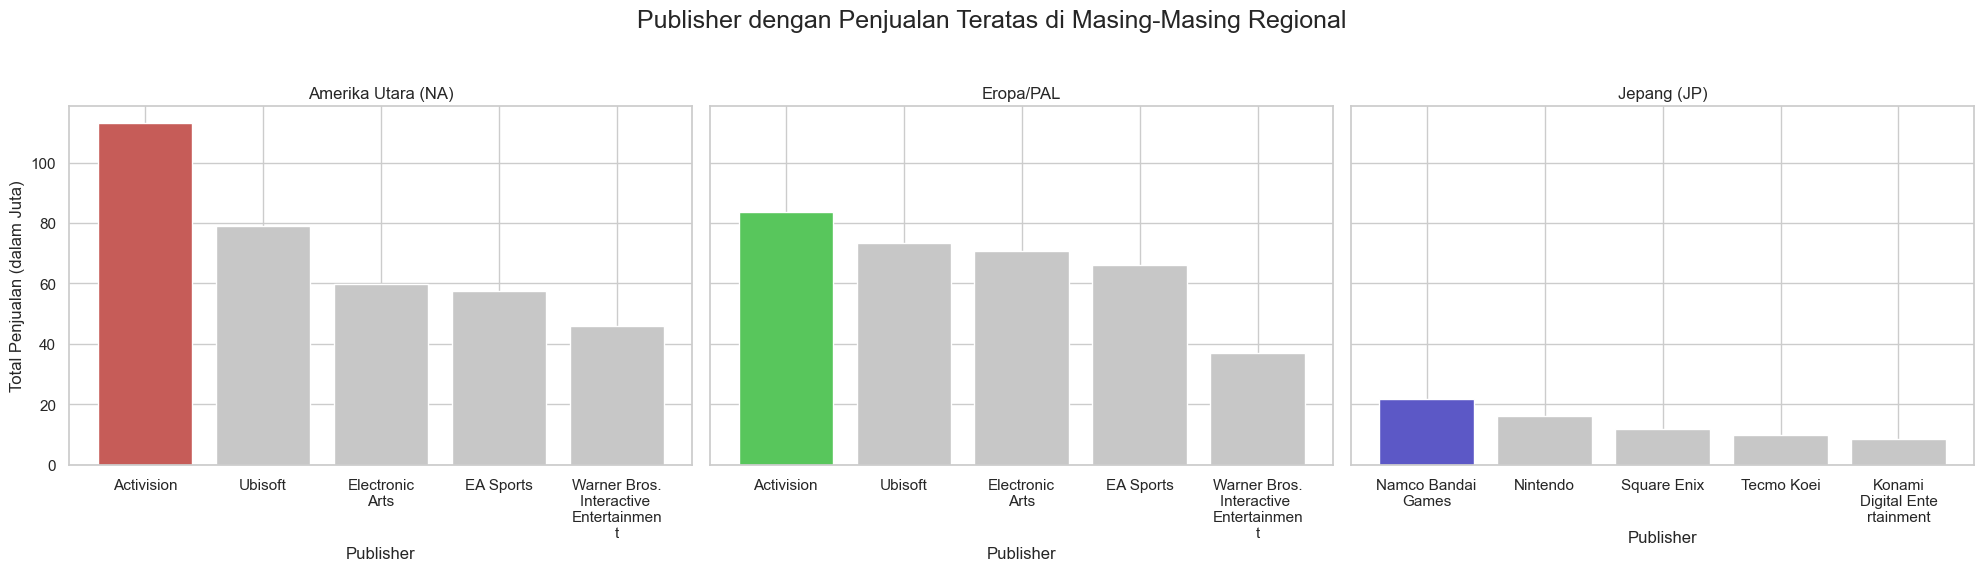

In [55]:
# Visualisasi
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
fig.suptitle('Publisher dengan Penjualan Teratas di Masing-Masing Regional', fontsize=18)

datasets = {
    'Amerika Utara (NA)': top_na_publisher,
    'Eropa/PAL': top_pal_publisher,
    'Jepang (JP)': top_jp_publisher
}

region_highlight_colors = {
    'Amerika Utara (NA)': '#C65C58',
    'Eropa/PAL': '#58C65C',
    'Jepang (JP)': '#5C58C6'
}

color_neutral = '#c7c7c7'

for i, (region, data) in enumerate(datasets.items()):
    ax = axes[i]
    highlight_color = region_highlight_colors[region]

    colors = [highlight_color if (value == data.values.max()) else color_neutral for value in data.values]
    
    ax.bar(x=data.index, height=data.values, color=colors)

    ax.set_title(region)
    ax.set_xticklabels([textwrap.fill(label, 12) for label in data.index])
    ax.set_xlabel('Publisher')

axes[0].set_ylabel('Total Penjualan (dalam Juta)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Interpretasi:**
Visualisasi ini menunjukkan perbedaan yang jelas dalam dominasi pasar. Di pasar Barat (Amerika Utara dan Eropa/PAL), Activision adalah pemain utama, diikuti oleh Ubisoft dan Electronic Arts. Namun, di pasar Jepang, lanskapnya sangat berbeda, dengan Namco Bandai Games dan Nintendo memimpin pasar. Ini mengindikasikan bahwa strategi pemasaran dan pengembangan game harus disesuaikan secara spesifik untuk setiap regional.

### **Pertanyaan 4: Platform game mana yang memiliki rata-rata penjualan per game tertinggi?**
Untuk mengetahui platform mana yang paling "menguntungkan" atau memiliki judul-judul paling sukses, saya menghitung rata-rata penjualan global per game untuk setiap konsol. Ini memberikan gambaran yang lebih adil daripada total penjualan, karena tidak dipengaruhi oleh jumlah game yang dirilis.



--- Analisis Pertanyaan 4: Platform dengan Rata-Rata Penjualan Tertinggi ---
console
X360    0.584088
PS3     0.450946
Wii     0.407667
GBC     0.310000
PS4     0.280115
PS2     0.275769
XOne    0.214464
DS      0.214400
GBA     0.211667
N64     0.188571
Name: total_sales, dtype: float64


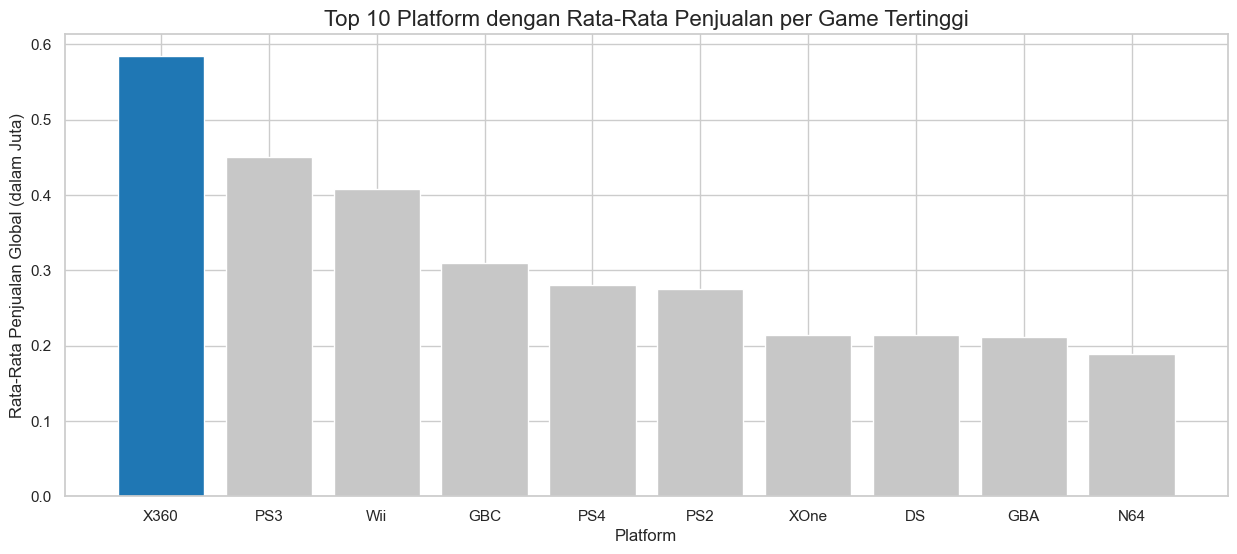

In [61]:
print("\n\n--- Analisis Pertanyaan 4: Platform dengan Rata-Rata Penjualan Tertinggi ---")
avg_sales_platform = df_cleaned.groupby('console')['total_sales'].mean().sort_values(ascending=False)
top_avg_sales_platform = avg_sales_platform.head(10)
print(top_avg_sales_platform)

plt.figure(figsize=(15, 6))
colors = ['#1f77b4' if (x == top_avg_sales_platform.values.max()) else '#c7c7c7' for x in top_avg_sales_platform.values]
plt.bar(x=top_avg_sales_platform.index, height=top_avg_sales_platform.values, color=colors)
plt.title('Top 10 Platform dengan Rata-Rata Penjualan per Game Tertinggi', fontsize=16)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Rata-Rata Penjualan Global (dalam Juta)', fontsize=12)
plt.show()

**Interpretasi:**
Menariknya, platform dengan rata-rata penjualan per game tertinggi adalah konsol generasi yang lebih tua seperti *X360* dan *PS3*. Ini menunjukkan bahwa meskipun platform-platform ini tidak lagi merilis banyak game baru, judul-judul blockbuster yang pernah dirilis di sana memiliki penjualan yang sangat masif. Platform modern seperti PS4 masih masuk dalam 10 besar, namun rata-ratanya lebih rendah, kemungkinan karena jumlah game yang dirilis jauh lebih banyak.

### **Pertanyaan 5: Genre game apa yang paling laku di masing-masing pasar?**
Analisis terakhir ini bertujuan untuk memahami perbedaan selera genre antar regional. Dengan mengelompokkan total penjualan berdasarkan genre untuk setiap pasar, kita bisa melihat preferensi unik di setiap wilayah.



--- Analisis Pertanyaan 5: Genre Terlaris di Masing-Masing Pasar ---


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8524\1237339949.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([textwrap.fill(label, 12) for label in data.index])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8524\1237339949.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([textwrap.fill(label, 12) for label in data.index])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8524\1237339949.py:32: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([textwrap.fill(label, 12) for label in data.index])


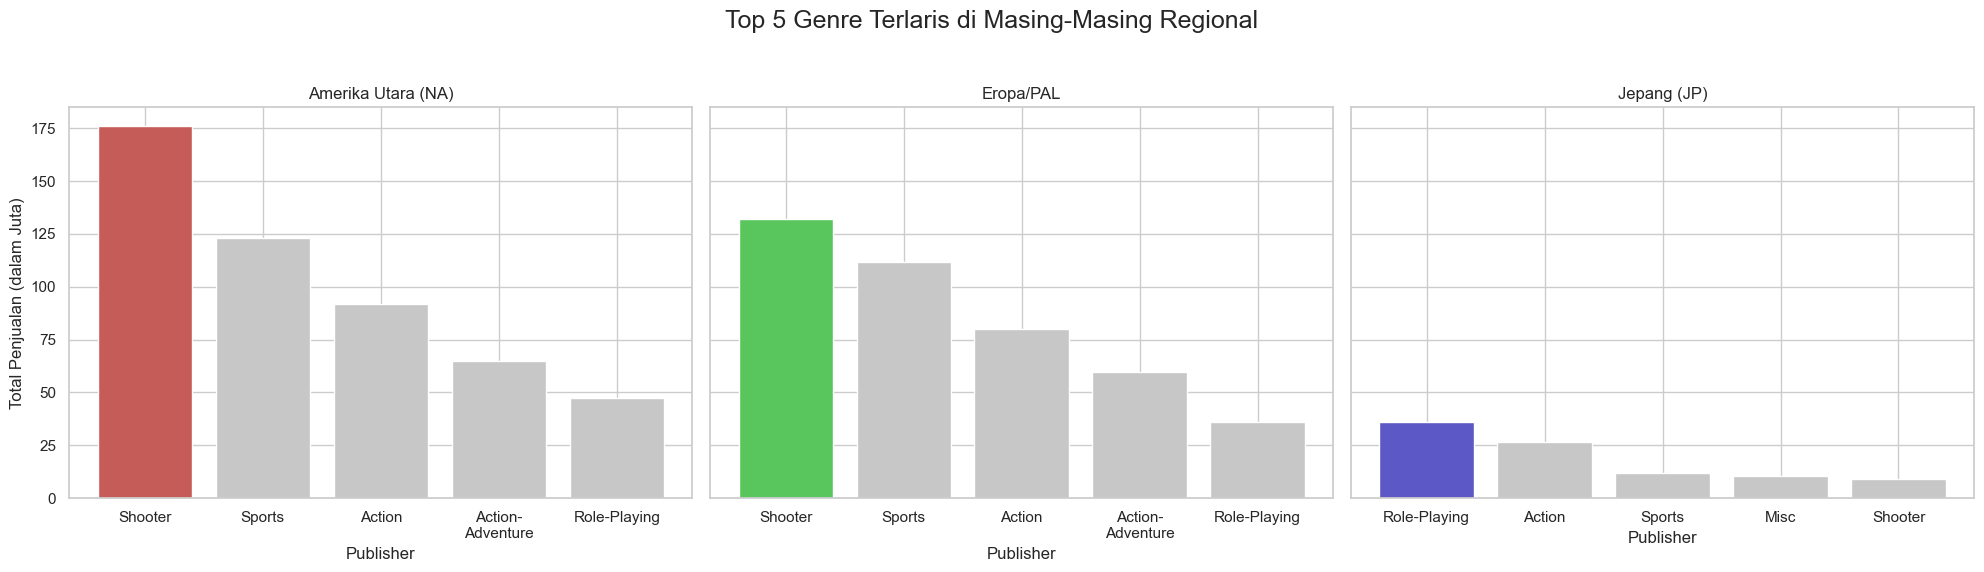

In [62]:
print("\n\n--- Analisis Pertanyaan 5: Genre Terlaris di Masing-Masing Pasar ---")
genre_na_sales = df_cleaned.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
genre_pal_sales = df_cleaned.groupby('genre')['pal_sales'].sum().sort_values(ascending=False).head(5)
genre_jp_sales = df_cleaned.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)
fig.suptitle('Top 5 Genre Terlaris di Masing-Masing Regional', fontsize=18)

datasets1 = {
    'Amerika Utara (NA)': genre_na_sales,
    'Eropa/PAL': genre_pal_sales,
    'Jepang (JP)': genre_jp_sales
}

region_highlight_colors = {
    'Amerika Utara (NA)': '#C65C58',
    'Eropa/PAL': '#58C65C',
    'Jepang (JP)': '#5C58C6'
}

color_neutral = '#c7c7c7'

for i, (region, data) in enumerate(datasets1.items()):
    ax = axes[i]
    highlight_color = region_highlight_colors[region]

    colors = [highlight_color if (value == data.values.max()) else color_neutral for value in data.values]
    
    ax.bar(x=data.index, height=data.values, color=colors)

    ax.set_title(region)
    ax.set_xticklabels([textwrap.fill(label, 12) for label in data.index])
    ax.set_xlabel('Publisher')

axes[0].set_ylabel('Total Penjualan (dalam Juta)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**Interpretasi:**
Hasilnya kembali menunjukkan perbedaan selera pasar yang signifikan. Pasar Amerika Utara dan Eropa/PAL memiliki preferensi yang mirip, di mana genre Shooter dan Sports sangat dominan. Sebaliknya, pasar Jepang menunjukkan preferensi yang sangat kuat terhadap genre Role-Playing, yang bahkan mengalahkan genre Action dan Sports. Ini memperkuat kesimpulan bahwa pendekatan "satu untuk semua" tidak akan efektif di industri game global.

### **Analisis Hubungan Antar Pasar (Opsional)**
Untuk melihat apakah ada kesamaan tren antara pasar-pasar utama, saya membuat scatter plot yang membandingkan penjualan di Amerika Utara (na_sales) dengan penjualan di Eropa/PAL (pal_sales). Setiap titik mewakili satu game.

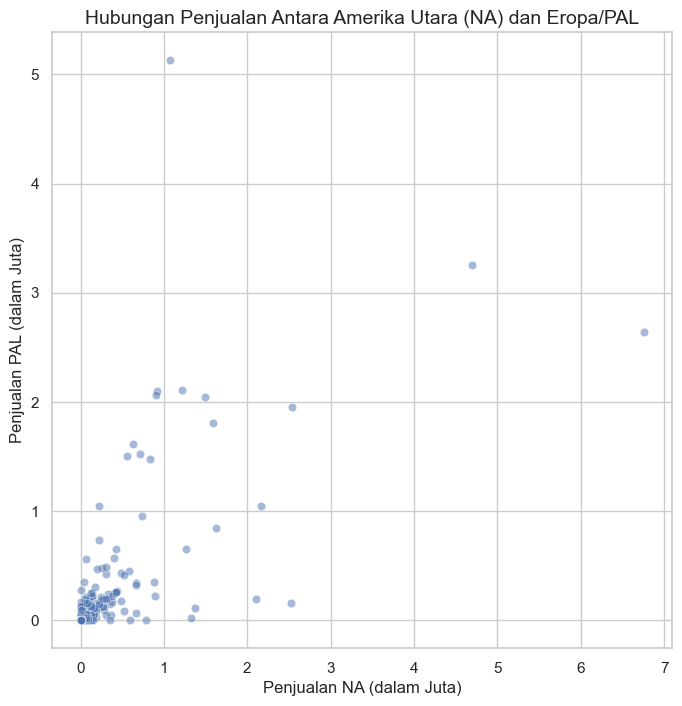

In [40]:
plt.figure(figsize=(8, 8))
sample_df = df_cleaned.sample(n=1000, random_state=42)
sns.scatterplot(x='na_sales', y='pal_sales', data=sample_df, alpha=0.5)
plt.title('Hubungan Penjualan Antara Amerika Utara (NA) dan Eropa/PAL', fontsize=14)
plt.xlabel('Penjualan NA (dalam Juta)', fontsize=12)
plt.ylabel('Penjualan PAL (dalam Juta)', fontsize=12)
plt.grid(True)
plt.show()

**Interpretasi:**
Grafik scatter plot di atas menunjukkan adanya korelasi positif yang kuat antara penjualan di Amerika Utara dan Eropa/PAL. Titik-titik data cenderung membentuk garis lurus yang naik dari kiri bawah ke kanan atas. Ini berarti, game yang laku keras di Amerika Utara juga cenderung laku keras di Eropa/PAL, dan sebaliknya. Kesamaan selera ini menandakan bahwa strategi pemasaran untuk kedua regional ini bisa dibuat serupa.

### **Proporsi Penjualan Global Berdasarkan Regional**
Untuk memahami seberapa besar kontribusi setiap pasar terhadap total penjualan global, saya membuat visualisasi pie chart. Ini menunjukkan persentase pangsa pasar dari setiap regional.

In [41]:
regional_sales = df_cleaned[['na_sales', 'pal_sales', 'jp_sales', 'other_sales']].sum()

print("--- Total Penjalan per Regional ---")
print(regional_sales)

--- Total Penjalan per Regional ---
na_sales       673.36
pal_sales      564.44
jp_sales       144.64
other_sales    185.09
dtype: float64


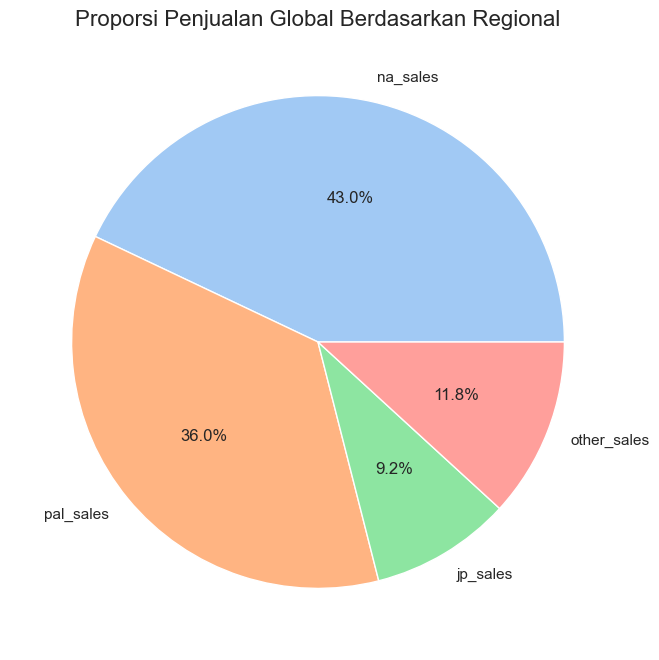

In [44]:
plt.figure(figsize=(10, 8))
plt.pie(
    regional_sales,
    labels=regional_sales.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('pastel', len(regional_sales))
)
plt.title('Proporsi Penjualan Global Berdasarkan Regional', fontsize=16)
plt.ylabel('')
plt.show()

**Interpretasi:**
Dari pie chart di atas, terlihat jelas bahwa pasar game global didominasi oleh dua wilayah utama: *Amerika Utara (na_sales)* yang berkontribusi sebesar *43.0%* dan *Eropa/PAL (pal_sales)* dengan *36.0%*. Pasar Jepang (jp_sales) dan wilayah lainnya (other_sales) memiliki pangsa pasar yang lebih kecil. Ini memperkuat kesimpulan bahwa pasar Barat adalah target utama untuk penjualan game secara global.

## **Kesimpulan**
Dari analisis yang telah dilakukan, dapat disimpulkan bahwa:
* **Dominasi Genre:** Genre Shooter, Sports, dan Action secara konsisten mendominasi pasar game global, menunjukkan preferensi pasar terhadap game dengan aksi cepat.
* **Siklus Industri:** Industri game mengalami puncak produksi pada tahun 2018 sebelum mengalami penurunan jumlah rilis, yang mungkin menandakan pergeseran ke model "game as a service" atau siklus konsol baru.
* **Perbedaan Pasar Regional:** Terdapat perbedaan selera yang sangat jelas antara pasar Barat (Amerika Utara & Eropa/PAL) yang menyukai genre Shooter, dengan pasar Jepang yang sangat didominasi oleh genre Role-Playing dan publisher lokal seperti Nintendo.
* **Pentingnya Game Blockbuster:** Sebagian besar penjualan game terkonsentrasi pada segelintir judul super sukses (outliers), sementara mayoritas game lainnya memiliki penjualan yang relatif kecil.

## **Rekomendasi Bisnis**
Berdasarkan temuan di atas, berikut adalah beberapa rekomendasi yang dapat dipertimbangkan:
1.  **Strategi Portofolio Global & Lokal:** Perusahaan game global sebaiknya memiliki portofolio yang seimbang. Produksi game bergenre Shooter dan Sports dapat menargetkan pasar Barat yang luas, namun investasi dalam game Role-Playing yang dilokalkan sangat krusial untuk berhasil di pasar Jepang.
2.  **Peluang di Pasar "Retro":** Platform generasi lama seperti X360 dan PS3 menunjukkan rata-rata penjualan per game yang sangat tinggi. Ini menandakan adanya peluang pasar yang kuat untuk game "remastered" atau "remake" dari judul-judul populer di platform tersebut, yang mungkin memiliki biaya pengembangan lebih rendah namun potensi keuntungan yang tinggi.
